<a href="https://colab.research.google.com/github/Ratnakar2022/Netflix-Movies-and-TV-Shows/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# In this project, you are required to do
Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

# **Attribute Information**
show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

# **Import Libraries and Data.**

In [2]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install -U kaleido 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 129 kB/s 


In [4]:
import plotly.express as px

In [5]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
netflix_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')



# **Let's See See Columns Value**

In [7]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
# Shape of the data.
netflix_data.shape

(7787, 12)

In [10]:
# Basic info about the data.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here We can see many of the column have null values. only the release_year has the Int type rest all object type even the rating column also.

In [11]:
# Check for null values.
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
for col in netflix_data.columns:
  null_rate =netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate>0:
    print(f'Percentage of null values in {col} : {null_rate}%') 


Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [13]:
# Check for duplicated entries.
netflix_data.duplicated().sum()

0

In [14]:
# Statistical info.
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


Here are the some points:

1.  There are 7787 rows and 12 columns provided in the data.
2.  Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.



**Lets clean the Data**

**First replace few null values**

In [15]:
# Number of null values in date_added.
netflix_data.date_added.isnull().sum()

10

In [16]:
# Remove null values in date_added.
netflix_data.dropna(subset=['date_added'], inplace=True)

In [17]:

# Number of null values in rating.
netflix_data.rating.isnull().sum()


# Remove null values in rating.
netflix_data.dropna(subset=['rating'], inplace=True)

In [18]:
# Check the shape of our data.
netflix_data.shape
     

(7770, 12)

As for the rest of the columns containing null values, we will handle them accordingly in future analyses.*

*Second, add few more datetime features

In [19]:
# Create new features to store date, day, month and year seperately.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Compute month.
     

In [20]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


# **Exploratory Data Analysis**

### **Content Type On Netflix**

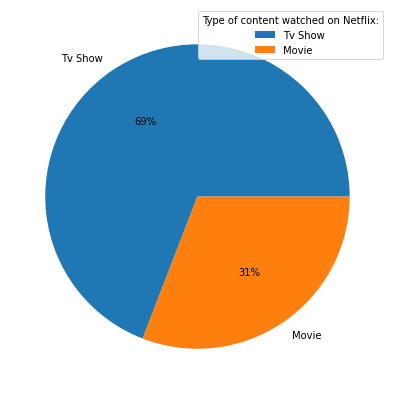

In [21]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = netflix_data.type.value_counts()


fig = plt.figure(figsize =(10, 7))
plt.pie(tv_show, labels = labels, autopct='%1.0f%%')

plt.legend(title = "Type of content watched on Netflix:")
plt.show()

*69% of the content available on Netflix are movies; the remaining 30.9% are TV Shows.

**Content growth over years**


In [22]:
# Plot growth of the contents over the years.
tv_show = netflix_data[netflix_data["type"] == "TV Show"]
movie = netflix_data[netflix_data["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)


fig.show()

In [23]:
# Check why does it suddenly drop in 2021.
len(netflix_data[netflix_data['year_added'] == 2021])

117

Number of movies on Netflix is much higher than tv shows.

We can see from 2015 a growth in the number of movies and tv shows uploaded by Netflix on its platform.

The highest number of movies and tv shows got added in 2019 and 2020.

The line plot shows very few movies, and tv shows got added in 2021 because we have less data for this year 


**Lets check in which month do most movies and tv shows get added**


In [24]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(netflix_data.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)
months_df

,month,count
0,12,832
1,10,785
2,1,756
3,11,738
4,3,668
5,9,618
6,8,617
7,7,600
8,4,600
9,5,543


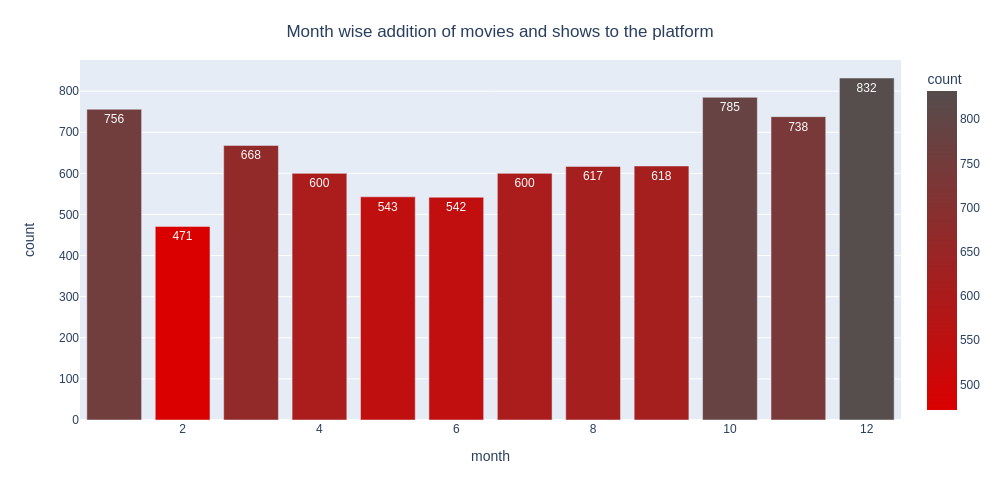

In [25]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
fig.show('png')
     

Most of the content is uploaded either by year ending or beginning.
October, November, December, and January are months in which many shows and movies get uploaded to the platform.
It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time

**Which days having newly added tv shows or movies**

In [26]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix_data.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

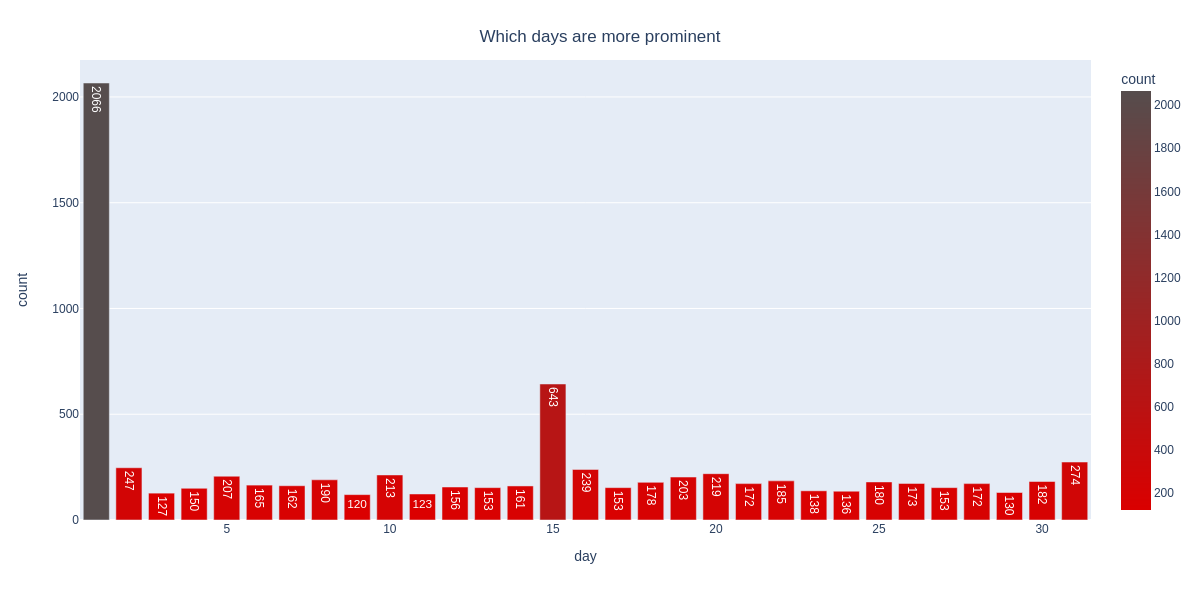

In [27]:
fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
# fig.show()
fig.show('png')

By this graph we can say that the most of the content is uploaded at the beginning, middle, or the end of a month.
Which makes 1st, 15th or 31st of a month more prominent in getting new tv shows and movies.*

# **Content is produced by different countries.**


In [28]:
# Country had 505 null values in it, we will replace these null values with the most occurring country
netflix_data['country'].fillna('United States', inplace=True)
country_df  = pd.DataFrame(netflix_data.country.value_counts())
country_df.reset_index(inplace=True)
country_df.rename(columns={'index':'Country', 'country':'count'}, inplace=True)
country_df


,Country,count
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


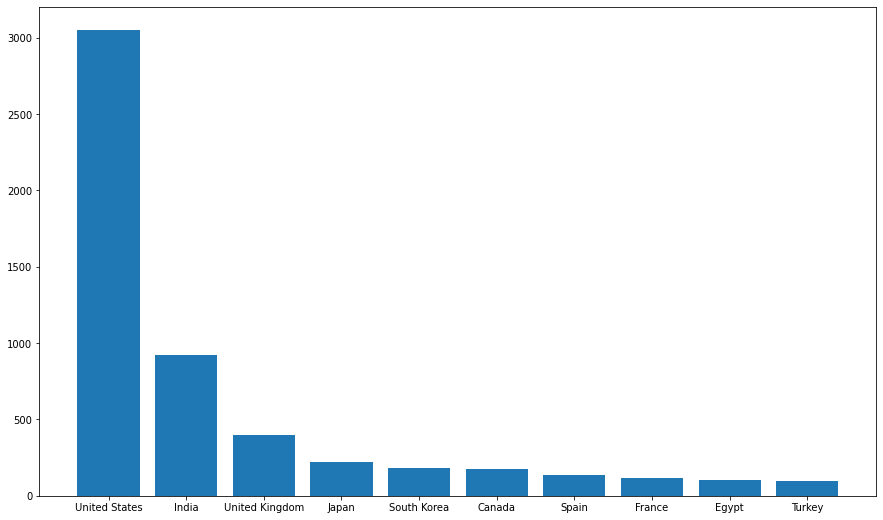

In [29]:

# Lets find the top ten countries that produce most of the content.
top_country = country_df['Country']
total_count = country_df['count']
fig = plt.figure(figsize =(15, 9))
plt.bar(top_country[0:10], total_count[0:10])
plt.show()

Most of the content providers are in the above top-ten countries.
In which USA, India, and Uk create more than half of the tv shows and movies on Netflix

# **Release_year:**
**In which year the most content released **

In [30]:
# Put the data into bins.
release_yr_bin = pd.cut(netflix_data.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


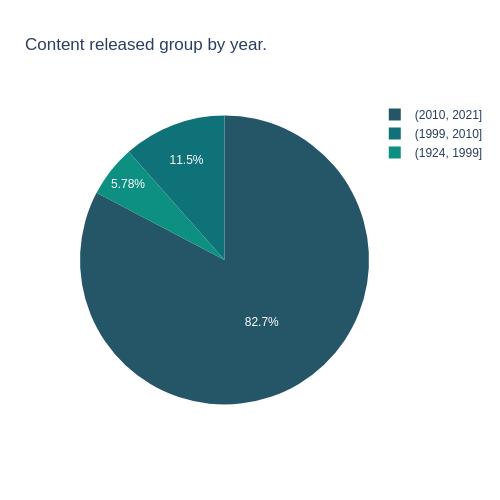

In [31]:
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.Aggrnyl, title='Content released group by year.',height=500, width=500)
# fig.show()
fig.show('png')

82% of the content available was released between 2010 and 2021.
17.28% of the content available was released before 2010.

# **Title:**

**lets create a wordcloud to see which words appear the most in the titles for movies and tv shows.**

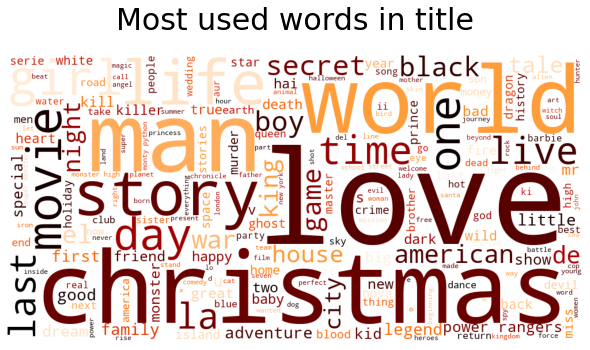

In [32]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


*  **Most repeated words in title include Christmas, Love, World, Man, and Story.** 
*  ***We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.***

# ***Description: ***

**Similarly create wordcloud for description to see which words appear the most.**

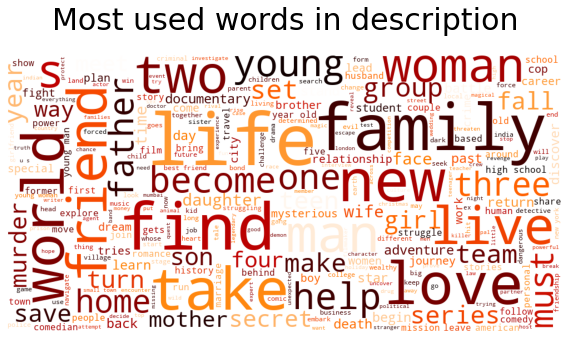

In [33]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.

# **Director**

**Directors that have most number of the movies and tv shows**

In [34]:
# Replace the null values in director.
netflix_data['director']=netflix_data['director'].fillna('')     
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


In [38]:
 # We will not include the null values.
directors_list =netflix_data.director.value_counts().reset_index().head(25)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
directors_list

,Directors name,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Robert Rodriguez,8


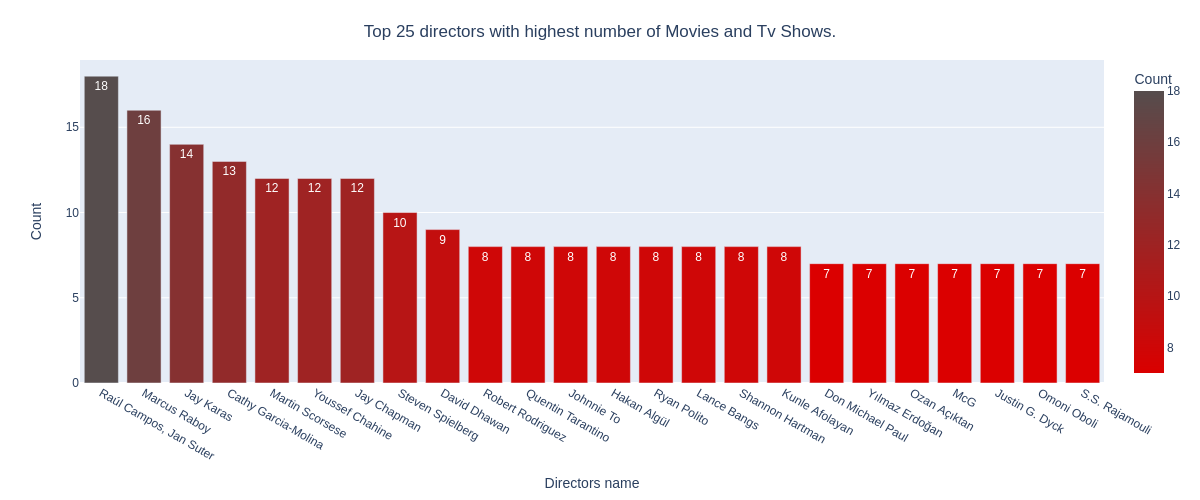

In [39]:
#plot the graph for directors
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows.

# **Cast:**

Actors that have most number of the movies and tv shows

In [59]:
netflix_data_cast = netflix_data.copy() #copy the data in to the netflix_data_cast
netflix_data_cast.dropna(subset=['cast'], inplace=True)    # removing nan value 

# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list 

In [64]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(netflix_data_cast)]).T.reset_index()

In [65]:
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


6 of the actors in the top ten list of most numbers tv shows and movies are from India